# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [443]:
import os
import pandas as pd
os.chdir('/Users/admin/Downloads/assignment3_data/fruit')
path = os.getcwd()
files = os.listdir(path)


In [444]:
fruit = pd.DataFrame()
for i in range(0,len(files)-1):
    data = pd.ExcelFile(files[i])
    dx = data.parse()
    name=re.sub(".xlsx","",files[i])
    a=dx[dx.ix[:,0]=='Fresh1'].iloc[:,[0,1,3,4,6]]
    #get the columns which are useful to us
    a['typefood']=['fruit']
    a['food']=name
    a.columns = ['form','price_per_lb','yield','lb_per_cup','price_per_cup','type','food']
    fruit = fruit.append(a)
fruit=fruit.dropna()
fruit

,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food
2,Fresh1,1.56752,0.9,0.242508,0.422373,fruit,apples
2,Fresh1,3.04007,0.93,0.363763,1.1891,fruit,apricots
2,Fresh1,0.566983,0.64,0.330693,0.292965,fruit,bananas
2,Fresh1,4.73462,0.95,0.31967,1.59318,fruit,blueberries
2,Fresh1,0.535874,0.51,0.374786,0.3938,fruit,cantaloupe
2,Fresh1,3.59299,0.92,0.341717,1.33455,fruit,cherries
2,Fresh1,0.897802,0.49,0.462971,0.848278,fruit,grapefruit
2,Fresh1,2.09383,0.96,0.330693,0.721266,fruit,grapes
2,Fresh1,0.796656,0.46,0.374786,0.649077,fruit,honeydew
2,Fresh1,2.04468,0.76,0.385809,1.03797,fruit,kiwi


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [445]:
os.chdir('/Users/admin/Downloads/assignment3_data/vegetables')
path = os.getcwd()
files = os.listdir(path)
vegetables = pd.DataFrame()
for i in range(0,len(files)-1):
    data = pd.ExcelFile(files[i])
    dx = data.parse()
    name=re.sub(".xlsx","",files[i])
    a=dx[dx.ix[:,0]=='Fresh1'].iloc[:,[0,1,3,4,6]]
    a['typefood']=['vegetables']
    a['food']=name
    a.columns = ['form','price_per_lb','yield','lb_per_cup','price_per_cup','type','food']
    vegetables = vegetables.append(a)
vegetables
#we can find out that for some of the fruits, even they have the form Fresh 1, we still get the NA value. After looking through the xlsx file, we can observe that there are sub types beneath the type fresh, and that's why we get the wrong output of these vegetables.  

,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food
2,Fresh1,1.17225,0.458554,0.451948,1.15536,vegetables,acorn_squash
2,Fresh1,2.21305,0.375309,0.385809,2.27497,vegetables,artichoke
2,Fresh1,3.21349,0.493835,0.396832,2.58227,vegetables,asparagus
2,Fresh1,2.23587,0.740753,0.31967,0.964886,vegetables,avocados
0,NaN,NaN,NaN,NaN,NaN,vegetables,beets
0,NaN,NaN,NaN,NaN,NaN,vegetables,black_beans
0,NaN,NaN,NaN,NaN,NaN,vegetables,blackeye_peas
0,NaN,NaN,NaN,NaN,NaN,vegetables,broccoli
2,Fresh1,2.76355,1.06,0.341717,0.890898,vegetables,brussels_sprouts
2,Fresh1,1.24474,0.714,0.451948,0.787893,vegetables,butternut_squash


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [448]:
vegetables=vegetables.dropna()
data=fruit.append(vegetables)
data[['yield','lb_per_cup','price_per_cup','price_per_lb']] = data[['yield','lb_per_cup','price_per_cup','price_per_lb']].apply(pd.to_numeric)
data.dtypes
#I have got the complete dataset and named it data, and transfered all numeric variable to numeric format.

form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
type              object
food              object
dtype: object

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

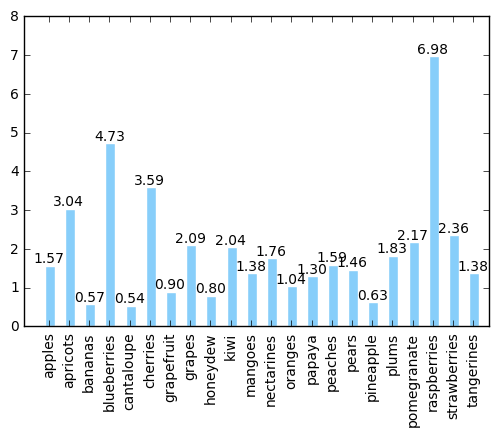

In [449]:
import numpy as np
from matplotlib import pyplot as plt
n = len(fruit[['price_per_lb']])
X = np.arange(n)+1
price=fruit.price_per_lb.tolist()
plt.bar(X,price,width = 0.5,facecolor = 'lightskyblue',edgecolor = 'white')
for x,y in zip(X,price):
    plt.text(x+0.2, y, '%.2f' % y, ha='center', va= 'bottom')
plt.ylim(0,+8)
plt.xlim(0,+23)
plt.xticks(X+0.2,fruit.food, rotation='vertical')
plt.show()
#according to the plot, we can observe that the rasperries are the most expensive, and cantaloupe are the least expensive.


In [334]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 


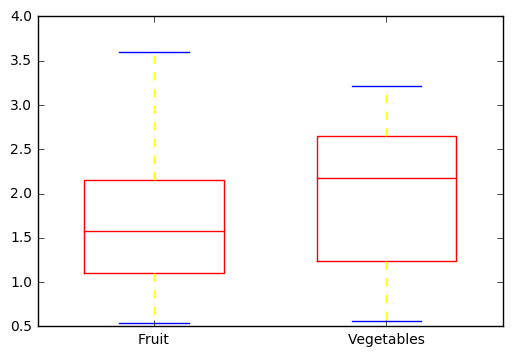

In [450]:
fruitp=fruit.price_per_lb
fruitp=np.array(fruitp, dtype=pd.Series)
vegep=vegetables.price_per_lb
vegep=np.array(vegep, dtype=pd.Series)
data_to_plot = [fruitp,vegep]
bp=plt.boxplot(data_to_plot, sym='', widths=0.6)
ticks = ['Fruit', 'Vegetables']
plt.xticks(np.arange(1,3),ticks)
def set_box_color(bp, color1,color2,color3):
    plt.setp(bp['boxes'], color=color1)
    plt.setp(bp['whiskers'], color=color2)
    plt.setp(bp['caps'], color=color3)
    plt.setp(bp['medians'], color=color1)
set_box_color(bp, 'red','yellow','blue')
plt.show()
#through the comparison of boxplot of fruit and vegetables, we can find out that the range of prices of fruit is larger than that of vegetables.
#However, the q1,q3, and median of vegetables are all higher than those of fruit.


In [456]:
os.chdir('/Users/admin/Downloads/nutrition')
path = os.getcwd()
files = os.listdir(path)
#I have downloaded the nutrition fact of all these fruit and vegetables in my dataset from USDA official website. I will read them and combine them with my original dataset the decide which fruit or vegetables are the best value for the price. 

In [457]:
#read in the nutrition fact of the fruits.
fnut = pd.DataFrame()
a=xrange(7)
for i in range(1,len(files)):
    x= pd.read_csv(files[i], skiprows=6,header=None)
    b=x.iloc[a,[2]]
    b=b.transpose()
    name=re.sub(".csv","",files[i])
    b['food']=name
    b.columns = ['Water','Energy','Protein','fat','Carbohydrate','Fiber','Sugars','food']
    fnut = fnut.append(b)
fnut=fnut.dropna()
fnut.head()


,Water,Energy,Protein,fat,Carbohydrate,Fiber,Sugars,food
2,85.56,52,0.26,0.17,13.81,2.4,10.39,apples
2,86.35,48,1.4,0.39,11.12,2,9.24,apricots
2,74.91,89,1.09,0.33,22.84,2.6,12.23,bananas
2,84.21,57,0.74,0.33,14.49,2.4,9.96,blueberries
2,90.15,34,0.84,0.19,8.16,0.9,7.86,cantaloupe


In [458]:
#read in the nutrition fact of the vegetables.
os.chdir('/Users/admin/Downloads/nutrition2')
path = os.getcwd()
files = os.listdir(path)

In [459]:
#read in the nutrition fact of the vegetables.
vnut = pd.DataFrame()
a=xrange(7)
for i in range(1,len(files)):
    x= pd.read_csv(files[i], skiprows=6,header=None)
    b=x.iloc[a,[2]]
    b=b.transpose()
    name=re.sub(".csv","",files[i])
    b['food']=name
    b.columns = ['Water','Energy','Protein','fat','Carbohydrate','Fiber','Sugars','food']
    vnut = vnut.append(b)
vnut=vnut.dropna()
vnut.head()

,Water,Energy,Protein,fat,Carbohydrate,Fiber,Sugars,food
2,87.78,40.0,0.80,0.10,10.42,1.5,0.00,acorn_squash
2,84.94,47.0,3.27,0.15,10.51,5.4,0.99,artichoke
2,93.22,20.0,2.20,0.12,3.88,2.1,1.88,asparagus
2,73.23,160.0,2.00,14.66,8.53,6.7,0.66,avocados
2,86.00,43.0,3.38,0.30,8.95,3.8,2.20,brussels_sprouts


In [461]:
nut=fnut.append(vnut)
df=pd.merge(data, nut, on='food')
#now we have the complete dataset which contain all the information we need.
df.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food,Water,Energy,Protein,fat,Carbohydrate,Fiber,Sugars
0,Fresh1,1.567515,0.90,0.242508,0.422373,fruit,apples,85.56,52,0.26,0.17,13.81,2.4,10.39
1,Fresh1,3.040072,0.93,0.363763,1.189102,fruit,apricots,86.35,48,1.4,0.39,11.12,2,9.24
2,Fresh1,0.566983,0.64,0.330693,0.292965,fruit,bananas,74.91,89,1.09,0.33,22.84,2.6,12.23
3,Fresh1,4.734622,0.95,0.319670,1.593177,fruit,blueberries,84.21,57,0.74,0.33,14.49,2.4,9.96
4,Fresh1,0.535874,0.51,0.374786,0.393800,fruit,cantaloupe,90.15,34,0.84,0.19,8.16,0.9,7.86


In [388]:
df.dtypes

form              object
price_per_lb     float64
yield             object
lb_per_cup        object
price_per_cup     object
type              object
food              object
Water             object
Energy            object
Protein           object
fat               object
Carbohydrate      object
Fiber             object
Sugars            object
dtype: object

In [463]:
df[['Water','Energy','Protein','fat','Carbohydrate','Fiber','Sugars']]=df[['Water','Energy','Protein','fat','Carbohydrate','Fiber','Sugars']].apply(pd.to_numeric)

In [465]:
df['Energyp']=df.Energy/2080
df['Proteinp']=df.Protein/50
df['fatp']=df.fat/70
df['carbonp']=df.Carbohydrate/310
df['fiberp']=df.Fiber/30
df['suagarp']=df.Sugars/90
#calculating the percentage of the nutrient provided by the fruit or vegetables divided by recommended daily intake to see their nutrition value.

In [467]:
df['score']=5/df.price_per_lb*df['yield']*(df.Energyp+df.Proteinp+df.fatp+df.carbonp+df.fiberp+df.suagarp)
#this equation means that if we have 5 dollars to buy a certain kind of fruit or vegetable, how much nutrition we will get at last.
#5/price equals to the lbs we have, multiply yield to get the amount we can really absorb, and then multiply the sum of all the percentages of nutrient to get the final score.
#I have given each nutrient same weight since I am not a nutrition major and my lack of proficiency on this field.

In [468]:
df.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food,Water,Energy,Protein,...,Carbohydrate,Fiber,Sugars,Energyp,Proteinp,fatp,carbonp,fiberp,suagarp,score
0,Fresh1,1.567515,0.90,0.242508,0.422373,fruit,apples,85.56,52.0,0.26,...,13.81,2.4,10.39,0.025000,0.0052,0.002429,0.044548,0.080000,0.115444,0.782637
1,Fresh1,3.040072,0.93,0.363763,1.189102,fruit,apricots,86.35,48.0,1.40,...,11.12,2.0,9.24,0.023077,0.0280,0.005571,0.035871,0.066667,0.102667,0.400522
2,Fresh1,0.566983,0.64,0.330693,0.292965,fruit,bananas,74.91,89.0,1.09,...,22.84,2.6,12.23,0.042788,0.0218,0.004714,0.073677,0.086667,0.135889,2.063049
3,Fresh1,4.734622,0.95,0.319670,1.593177,fruit,blueberries,84.21,57.0,0.74,...,14.49,2.4,9.96,0.027404,0.0148,0.004714,0.046742,0.080000,0.110667,0.285250
4,Fresh1,0.535874,0.51,0.374786,0.393800,fruit,cantaloupe,90.15,34.0,0.84,...,8.16,0.9,7.86,0.016346,0.0168,0.002714,0.026323,0.030000,0.087333,0.854244


In [ ]:
colors=[]
for i in range(len(df['type'])):
    if df['type'][i]=='fruit':
        colors.append('b')
    else:
        colors.append('g')
#I have tried to use different colors for fruit and vegetable in my barplot, so I have created a list of blue and green colors which correspond with fruit and vegetables. 

In [1]:
score=df['score'].tolist()
type(score)

NameError: name 'df' is not defined

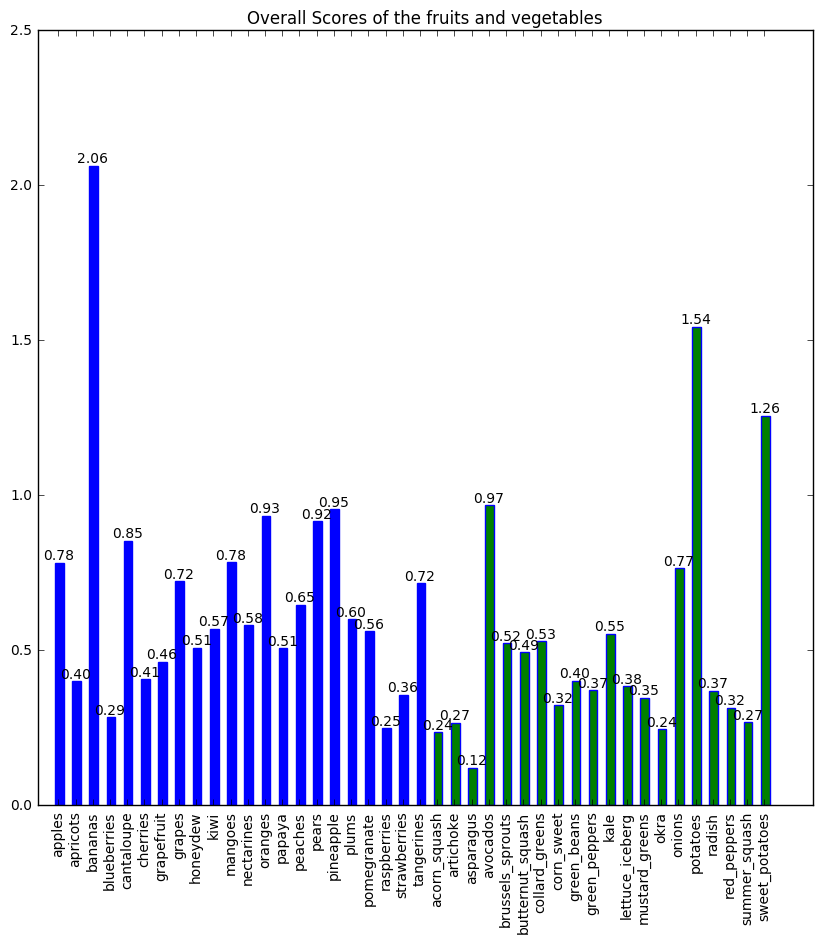

In [442]:
n = len(df['score'])
X = np.arange(n)+1
score=df['score'].tolist()
plt.figure(figsize=(10,10))
plt.bar(X,score,width = 0.5,color = colors,edgecolor = 'blue')
for x,y in zip(X,score):
    plt.text(x+0.2, y, '%.2f' % y, ha='center', va= 'bottom')
plt.ylim(0,+2.5)
plt.xlim(0,+45)
plt.xticks(X+0.2,df.food, rotation='vertical')
plt.title('Overall Scores of the fruits and vegetables')
plt.show()
#We can observe that among fruits, banana provides the most nutrition values, and among vegetables, onions are the best. If considering all fruit and vegetables, banana is the champion.

In [ ]:
#I have found it pretty surprise that blueberries provide low nutrition value compared to its second highest price among all fruit. 
#I think it might be because of the flavor and vitamin values.

In [ ]:
#I think no.3 and no.5 are almost the same question, since the food which provides the best combination of price, yield, and nutrition should be the best value of its price. 
#Therefore, my conclusion on this question is the same as my conclusion made in question 3.
#Banana is the best among fruit and onion is the best among vegetables. Overall speaking the banana is the best.